In [1]:
# colab 한글깨짐 해결위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,448 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and di

# 1. LinearSVM (선형 서포트 벡터 머신)

In [1]:
# matplotlib과 관련된 모듈을 미리 선언
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from sklearn.svm import SVC     # Support Vector Classifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1,
                          n_classes = 2, n_clusters_per_class = 1, random_state = 30)
# 사이킷런의 SVM패키지 안에 서포트 벡터 머신의 모형 SVC(Support Vector Classifier)를 제공한다.

In [4]:
y

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

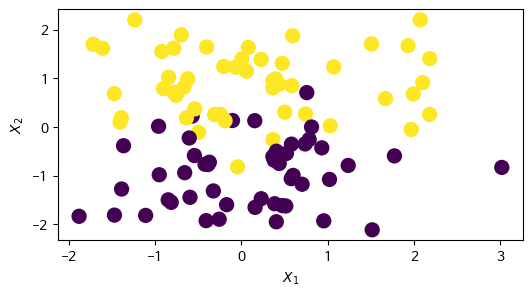

In [3]:
plt.figure(figsize = (6, 3))
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 100)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   shuffle = True)

In [6]:
#1번 임포트 모델
from sklearn.svm import SVC

#2번 모델 선택 & 모델.fit(학습데이터)
linear_svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [7]:
SVC?

SVC의 매개변수
- kernel : 커널을 설정한다, 기본값은 'rbf'
  - 'rbf': 유사 공간에 옮긴 후 분류
  - 'linear': 선형
  - 'poly': 2차 곡선
- C : 슬랙 변수 가중치(slack variable weight) 즉, 모델의 오차 허용률을 조절한다, 기본값은 1.0
- C는 얼마나 많은 데이터 샘플들을 다른 클래스에 놓이는 것을 허용하는지를 정해준다.
- 높은 C값은 모델을 더 유연하게 만들어주는 반면에, 낮은 C값은 모델을 더 안정적으로 만들어준다.

In [8]:
linear_svc.n_support_
# 각 클래스의 서포트의 개수, support vector의 개수

array([10, 10], dtype=int32)

In [9]:
linear_svc.support_vectors_
# 각 클래스의 서포트 x값 (x+. x-)

array([[ 7.85927562e-01, -2.57959730e-01],
       [ 8.13037304e-01, -1.77125524e-03],
       [-9.61741304e-01,  1.31964138e-02],
       [-1.04378289e-01,  1.31391317e-01],
       [-1.36815913e+00, -3.86680912e-01],
       [ 9.32147964e-01, -4.30160921e-01],
       [ 1.54638551e-01,  1.27789479e-01],
       [ 7.38732944e-01, -3.50239628e-01],
       [-5.72031155e-01,  2.23315502e-01],
       [ 5.80123785e-01, -3.54179592e-01],
       [-1.90365849e-01,  1.26048240e-01],
       [-5.40516552e-01,  3.70378557e-01],
       [-1.40853733e+00,  9.72217075e-02],
       [-6.38960098e-01,  1.82172732e-01],
       [ 5.03043054e-01,  3.02706521e-01],
       [-2.43243873e-01,  2.58245976e-01],
       [-3.12002333e-01,  2.52113837e-01],
       [ 1.96902533e+00, -5.09911121e-02],
       [ 3.66685623e-01, -2.60707536e-01],
       [ 7.43409431e-01,  2.66197855e-01]])

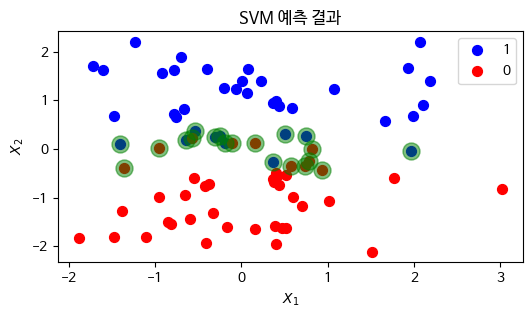

In [11]:
plt.figure(figsize = (6, 3))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s=50)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train ==0, 1], c = 'r', label = '0', s=50)
plt.scatter(linear_svc.support_vectors_[:, 0], linear_svc.support_vectors_[:, 1],
           s = 150, c = 'g', alpha = 0.5)
# alpha는 투명도
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [12]:
print('train score : {}\n\n'.format(linear_svc.score(X_train, y_train)))
print('test score : {}'.format(linear_svc.score(X_test, y_test)))

train score : 0.9125


test score : 0.85


In [13]:
print('실제 : {}'.format(y_test))
print('예측 : {}'.format(linear_svc.predict(X_test)))

print(len(y_test))

실제 : [1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0]
예측 : [1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0]
20


In [14]:
linear_svc01 = SVC(kernel = 'linear', C = 0.1).fit(X_train, y_train)
# 비교를 위해 C값을 매우 적게 설정했다.

In [15]:
linear_svc01.n_support_

array([18, 19], dtype=int32)

In [16]:
linear_svc01.support_vectors_

array([[ 7.85927562e-01, -2.57959730e-01],
       [ 8.13037304e-01, -1.77125524e-03],
       [ 3.80115702e-01, -6.84837130e-01],
       [-9.61741304e-01,  1.31964138e-02],
       [-1.04378289e-01,  1.31391317e-01],
       [-3.72633151e-01, -7.25574552e-01],
       [-1.36815913e+00, -3.86680912e-01],
       [ 9.32147964e-01, -4.30160921e-01],
       [ 3.64433198e-01, -6.09766996e-01],
       [ 5.21451726e-01, -5.44938983e-01],
       [ 1.54638551e-01,  1.27789479e-01],
       [-5.46078987e-01, -5.88253833e-01],
       [ 1.77474853e+00, -5.95399808e-01],
       [ 7.38732944e-01, -3.50239628e-01],
       [ 4.05290603e-01, -4.99403821e-01],
       [ 4.16579976e-01, -5.51478928e-01],
       [-5.72031155e-01,  2.23315502e-01],
       [ 5.80123785e-01, -3.54179592e-01],
       [-1.90365849e-01,  1.26048240e-01],
       [-1.47639136e+00,  6.83629163e-01],
       [ 4.35233881e-01,  8.78084740e-01],
       [-7.86074545e-01,  7.11637157e-01],
       [-6.66517308e-01,  8.17256927e-01],
       [-5.

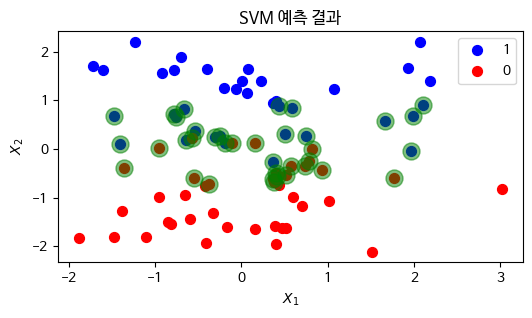

In [17]:
plt.figure(figsize = (6,3))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s=50)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train ==0, 1], c = 'r', label = '0', s=50)
plt.scatter(linear_svc01.support_vectors_[:, 0], linear_svc01.support_vectors_[:, 1],
           s = 150, c = 'g', alpha = 0.5)
# alpha는 투명도
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [22]:
print('train score : {}\n\n'.format(linear_svc01.score(X_train, y_train)))
print('test score : {}'.format(linear_svc01.score(X_test, y_test)))

train score : 0.9375


test score : 0.8


In [18]:
linear_svc10 = SVC(kernel = 'linear', C = 10).fit(X_train, y_train)

In [19]:
linear_svc10.n_support_

array([7, 7], dtype=int32)

In [20]:
linear_svc10.support_vectors_

array([[ 7.85927562e-01, -2.57959730e-01],
       [ 8.13037304e-01, -1.77125524e-03],
       [-9.61741304e-01,  1.31964138e-02],
       [-1.04378289e-01,  1.31391317e-01],
       [ 1.54638551e-01,  1.27789479e-01],
       [ 7.38732944e-01, -3.50239628e-01],
       [-5.72031155e-01,  2.23315502e-01],
       [-1.90365849e-01,  1.26048240e-01],
       [-1.40853733e+00,  9.72217075e-02],
       [-6.38960098e-01,  1.82172732e-01],
       [-3.12002333e-01,  2.52113837e-01],
       [ 1.96902533e+00, -5.09911121e-02],
       [ 3.66685623e-01, -2.60707536e-01],
       [ 7.43409431e-01,  2.66197855e-01]])

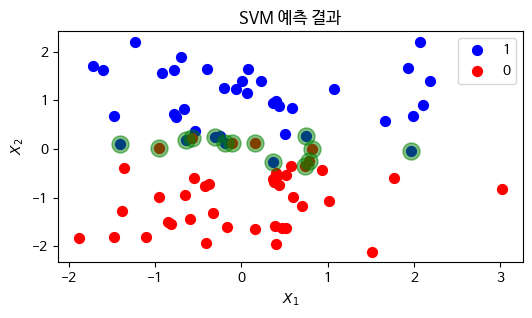

In [21]:
plt.figure(figsize = (6, 3))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s=50)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train ==0, 1], c = 'r', label = '0', s=50)
plt.scatter(linear_svc10.support_vectors_[:, 0], linear_svc10.support_vectors_[:, 1],
           s = 150, c = 'g', alpha = 0.5)
# alpha는 투명도
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [23]:
print('train score : {}\n\n'.format(linear_svc10.score(X_train, y_train)))
print('test score : {}'.format(linear_svc10.score(X_test, y_test)))

train score : 0.9125


test score : 0.85


SVM모델이 과적합이라면 C값을 줄여보도록 하자.

### 기본예제

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

data_iris = load_iris()
X = data_iris.data

y = data_iris.target

In [25]:
print(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
y[:5]

array([0, 0, 0, 0, 0])

In [30]:
data_iris.feature_names
# iris 데이터의 4가지 특성

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
data_iris.target_names
# iris의 데이터의 target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

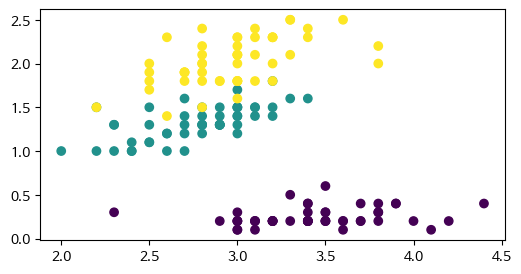

In [33]:
plt.figure(figsize = (6,3))
plt.scatter(X[:, 1], X[:, 3], c = y)    # sepal_width, petal_width
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = data_iris.target, # target 데이터의 클래스 비율에 맞게 데이터 split
                                                     shuffle = True)

In [35]:
from collections import Counter
Counter(y_train)

Counter({1: 37, 2: 37, 0: 38})

In [36]:
linear_svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

print('test score : {}'.format(linear_svm.score(X_test, y_test)))

test score : 0.9473684210526315


In [37]:
linear_svm.predict(X_test)
# 예측값

array([2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1])

In [38]:
y_test
# 실제값

array([2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2])

In [39]:
linear_svm.decision_function(X_test)
# 확률수치를 알 수 있는 predict_proba()가 제공되지는 않지만 decision_function()이 제공된다.

array([[-0.2757974 ,  1.15264006,  2.26597604],
       [ 2.24093476,  1.29807509, -0.30569745],
       [ 2.22802591,  1.29566411, -0.30306963],
       [ 0.88607318,  2.27427235, -0.26828803],
       [-0.26462697,  1.2036076 ,  2.23177051],
       [ 2.2387153 ,  1.29750102, -0.30514572],
       [-0.23926993,  2.2531866 ,  0.87302299],
       [ 2.22415286,  1.29476194, -0.30216622],
       [-0.22207327,  2.26890687,  0.77155861],
       [-0.2782045 ,  1.19488683,  2.26147527],
       [-0.27951785,  1.04497966,  2.27812757],
       [-0.24645012,  1.22083633,  2.15541569],
       [-0.28236934,  1.21067301,  2.26422054],
       [-0.25535387,  1.23240352,  2.16430061],
       [-0.23152244,  2.25736769,  0.82435274],
       [ 2.24588919,  1.297691  , -0.30593037],
       [-0.24808339,  2.26168144,  0.85801204],
       [-0.24854379,  2.25790701,  0.89067781],
       [-0.25061557,  2.26287359,  0.86262215],
       [ 2.24198647,  1.29719125, -0.30525596],
       [ 2.2451545 ,  1.29881109, -0.306

In [40]:
np.argmax(linear_svm.decision_function(X_test), axis=1)

array([2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1])

In [48]:
# 시각화를 위해서 2개의 특성만 사용했다. (sepal width, pedal length)
data_x = data_iris.data[:, [1,3]]
data_y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2,
                                                   shuffle = True, random_state = 30)
linear_svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

print('test score : {}'.format(linear_svm.score(X_test, y_test)))

test score : 0.9333333333333333


In [49]:
%pip install mglearn

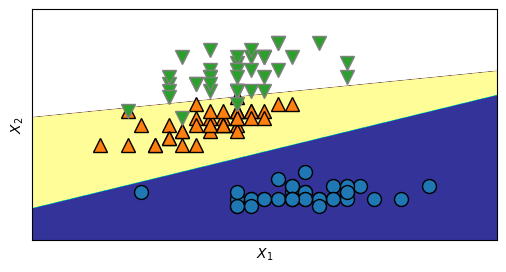

In [50]:
import mglearn
# 시각화를 위해 mglearn모듈을 사용했다.

plt.figure(figsize=(6, 3))
mglearn.plots.plot_2d_classification(linear_svm, X_train, eps=0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()
#

C값을 변경해보자

In [51]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.
train_score = []
test_score = []

for i in C:
    linear_svm = SVC(kernel = 'linear', C = i).fit(X_train, y_train)
    scoretr = linear_svm.score(X_train, y_train)
    scorete = linear_svm.score(X_test, y_test)
    train_score.append(scoretr)
    test_score.append(scorete)

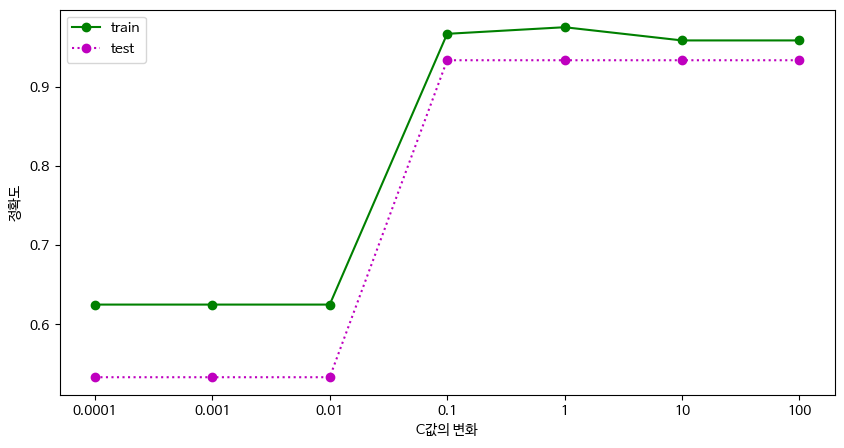

In [52]:
plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()

C값이 커질수록 과적합되는 모습을 볼 수 있다.
적절한 C값을 찾아줘야 한다.

### svm.LinearSVC()로 구현해보기

In [57]:
LinearSVC?

In [56]:
from sklearn.svm import LinearSVC
linear_svc2 = LinearSVC(C = 1, loss = 'hinge').fit(X_train, y_train)

In [58]:
print('train score : {}\n\n'.format(linear_svc2.score(X_train, y_train)))
print('test score : {}'.format(linear_svc2.score(X_test, y_test)))

train score : 0.8833333333333333


test score : 0.9


In [62]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

data_iris = load_iris()
X = data_iris.data[:, [1,3]]
y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = data_iris.target,
                                                    random_state = 30,
                                                     shuffle = True)

In [63]:
linear_svc = LinearSVC(C = 1, loss = 'hinge').fit(X_train, y_train)

print('test score : {:.3f}'.format(linear_svc.score(X_test, y_test)))

test score : 0.868


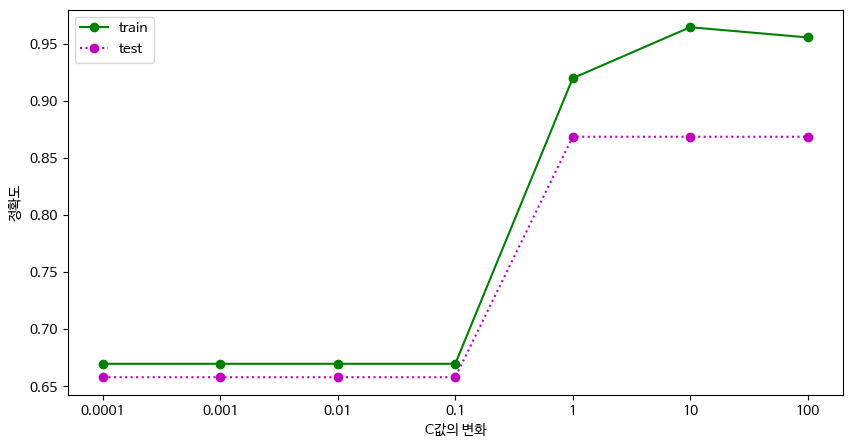

In [64]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for i in C:
    # SVC -> LinearSVC
    linear_svm = LinearSVC(C = i, loss = 'hinge').fit(X_train, y_train)
    scoretr = linear_svm.score(X_train, y_train)
    scorete = linear_svm.score(X_test, y_test)
    train_score.append(scoretr)
    test_score.append(scorete)

plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()

Logistic Regression은 확률값으로 WX의 값에 따라 0 ~ 1 사이의 확률값으로 예측해지만 SVM은 확률값이 아닌 1 or 0 으로 예측한다.

Logistic Regression의 Cost는 Z(Decision Boundary)가 아무리 커져도 0이 되지 않는다. 반면, SVM의 Cost는 Z가 1 or -1인 순간 0이 된다.(이를 Hinge Loss라고 하는데, 비확률적 분류 모델인 SVM의 Cost로 적합하다.)

LinearSVC()
  - kernel = 'linear'을 갖는 SVC()와 비슷하지만 libsvm이 아닌 liblinear의 관점에서 구현되어 규제와 loss함수 선택에 있어서 유연하며 데이터가 클 경우에 SVC()는 속도가 현저히 느려지기 때문에 LinearSVC()를 사용것을 권장한다.
  - penalty 매개변수로 규제를 선택할 수 있다.
  - pnealty의 기본값은 'l2'
  - loss의 기본값은 'squared hinge', SVC(kernel = 'linear')와 같은 효과를 위해서는 'hinge'로 설정한다.
    - hinge loss?
  - 데이터의 스케일을 맞추지 않고 SVC 모델과 비교하게 되면 차이가 크게 난다. StandardScaler를 사용하면 데이터의 스케일을 자동으로 맞춰준다.

### 스케일링 전, 후 비교

In [65]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X,y = make_blobs(n_samples = 400, centers= 2, random_state = 33) # 33

In [66]:
X[:, 0] # 모든 행의 0번째 열

array([-5.70062700e+00, -3.06818436e+00, -5.18771322e-01, -5.04608375e+00,
       -4.20842605e+00, -3.76362531e-01, -8.67191524e-01, -3.04604761e+00,
       -5.10658676e-01, -2.46405350e+00, -3.34593220e+00, -2.40681097e+00,
       -2.14266627e+00, -2.36155546e+00, -9.84217070e-01, -6.12450802e+00,
       -7.41396621e+00, -4.65841665e+00, -3.66418901e+00, -3.01470135e+00,
       -1.83081055e+00, -5.02894242e+00, -1.17249667e+00, -7.66375501e-01,
       -5.05674877e+00, -2.18222641e+00, -1.09121367e+00, -5.70489060e+00,
       -5.43078866e+00, -1.89015780e+00, -1.55348586e+00, -5.55244678e+00,
       -1.47531564e+00, -6.19352920e+00, -2.20732604e+00,  3.75422142e-01,
       -4.11882520e+00, -1.17450496e+00, -4.53396719e+00, -5.25465199e+00,
       -6.43859097e+00, -2.30184116e+00, -4.74077758e+00, -5.76298603e+00,
       -4.65018825e+00, -4.96748154e+00, -1.68956291e+00, -1.56664202e+00,
       -3.79110250e+00, -1.67360451e+00, -6.08501688e+00, -6.57289144e+00,
       -5.84831113e+00, -

In [67]:
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1]))

(5997.139810993906, 5434.833843369062)

In [68]:
X[:, 0] = X[:, 0]*100

In [69]:
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1]))

(59971398.10993906, 5434.833843369062)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

pre_scale = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

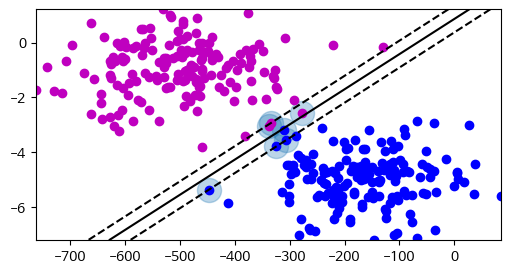

In [71]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = pre_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
plt.figure(figsize = (6,3))
plt.plot(X_train[:, 0][y_train == 1], X_train[:,1][y_train == 1], 'bo')
plt.plot(X_train[:, 0][y_train == 0], X_train[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(pre_scale.support_vectors_[:, 0],
            pre_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

np.sum(np.square(X_train[:, 0])), np.sum(np.square(X_train[:, 1]))

(48291059.81891509, 4329.823914492121)

In [73]:
X_scale = scaler.fit_transform(X_train)

np.sum(np.square(X_scale[:, 0])), np.sum(np.square(X_scale[:, 1]))

(320.0000000000002, 319.9999999999999)

In [74]:
fit_scale = SVC(kernel = 'linear', C = 1).fit(X_scale, y_train)

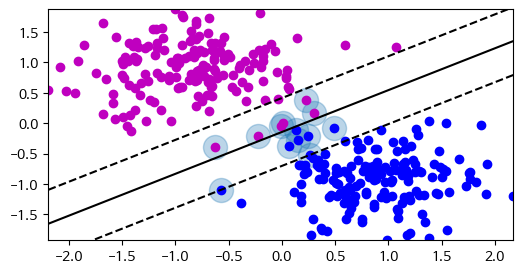

In [76]:
xmin = X_scale[:, 0].min()
xmax = X_scale[:, 0].max()
ymin = X_scale[:, 1].min()
ymax = X_scale[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = fit_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]

plt.figure(figsize = (6,3))
plt.plot(X_scale[:, 0][y_train == 1], X_scale[:,1][y_train == 1], 'bo')
plt.plot(X_scale[:, 0][y_train == 0], X_scale[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(fit_scale.support_vectors_[:, 0],
            fit_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()